# Importar nuevamente titanic.csv como dataframe

In [12]:
import pandas as pd

Titanic = pd.read_csv("titanic.csv")

# 1) Calcular el promedio de edad de los que sobrevivieron y los que no.

In [18]:
# Calculo el promedio de edad por grupo, donde "1" son aquellos que sobrevivieron y "0" los que no

PromedioEdad = Titanic.groupby('Survived')['Age'].mean()

PromedioEdad

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

# 2) Calcular edad máxima, edad mínima, de los que sobrevivieron y los que no.

In [19]:
# Calculo la edad máxima y mínima por grupo usando "max" y "min"

EdadMaxMin = Titanic.groupby('Survived')['Age'].agg(['max', 'min'])

EdadMaxMin

,max,min
Survived,,
0,74.0,1.00
1,80.0,0.42


# 3) Calcualar edad promedio por clase de los que sobrevivieron y los que no. 

In [20]:
# Calculo el promedio de edad por clase y supervivencia

EdadPromedioClase = Titanic.groupby(['Survived', 'Pclass'])['Age'].mean()

EdadPromedioClase

Survived  Pclass
0         1         43.695312
          2         33.544444
          3         26.555556
1         1         35.368197
          2         25.901566
          3         20.646118
Name: Age, dtype: float64

# 4) Del dataframe del titanic, calcular el promedio de edad de los que sobrevivieron y los que no, hacer un gráfico de barras que sea representativo. 

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64


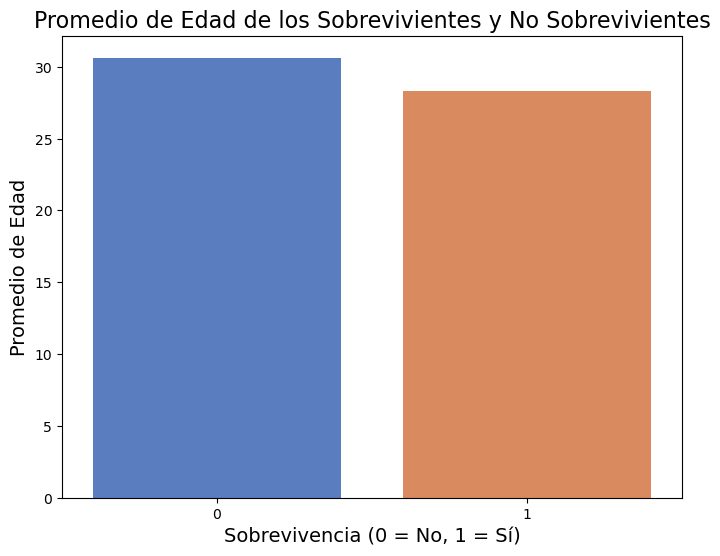

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculo el promedio de edad por supervivencia
PromedioEdad = Titanic.groupby('Survived')['Age'].mean()

print(PromedioEdad)

# Creo el gráfico de barras

plt.figure(figsize=(8, 6))
sns.barplot(x=PromedioEdad.index, y=PromedioEdad.values, hue=PromedioEdad.index, palette='muted', legend=False)

# Agrego algunas etiquetas y el título

plt.title('Promedio de Edad de los Sobrevivientes y No Sobrevivientes', fontsize=16)
plt.xlabel('Sobrevivencia (0 = No, 1 = Sí)', fontsize=14)
plt.ylabel('Promedio de Edad', fontsize=14)

plt.show()

# 5) Hacer un gráfico del tipo histograma que represente la frecuencia de edades únicamente de las mujeres que sobrevivieron. 

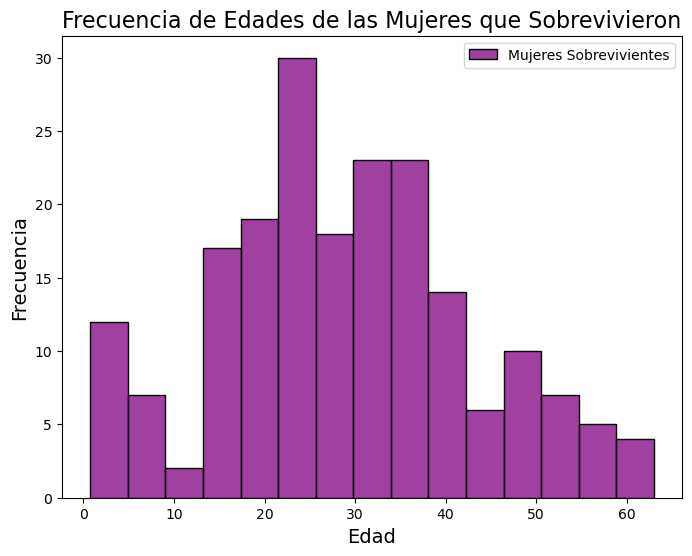

In [25]:
# Filtro solo por las mujeres que sobrevivieron

MujeresSobrevivientes = Titanic[(Titanic['Sex'] == 'female') & (Titanic['Survived'] == 1)]

# Creo el histograma

plt.figure(figsize=(8, 6))
sns.histplot(MujeresSobrevivientes['Age'], kde=False, bins=15, color='purple', label='Mujeres Sobrevivientes')

# Agrego algunas etiquetas y el título

plt.title('Frecuencia de Edades de las Mujeres que Sobrevivieron', fontsize=16)
plt.xlabel('Edad', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

plt.legend()
plt.show()

# 6) Importar el archivo GoldPrice.csv como dataframe

In [26]:
GoldPrice = pd.read_csv("goldprice.csv")

In [27]:
GoldPrice.head()

,Date,Price,Open,High,Low
0,"Aug 01, 2018",1216.6,1223.4,1223.4,1216.2
1,"Jul 31, 2018",1223.7,1220.4,1228.1,1213.0
2,"Jul 30, 2018",1221.3,1222.5,1223.9,1218.1
3,"Jul 27, 2018",1222.2,1223.5,1226.8,1216.7
4,"Jul 26, 2018",1225.3,1227.8,1227.8,1227.8


# 7) Crear una nueva columna que solo contenga el año y llamarla “Year”.

In [28]:
# Convierto la columna 'Date' a tipo datetime

GoldPrice['Date'] = pd.to_datetime(GoldPrice['Date'], format='%b %d, %Y')

# Creo la nueva columna 'Year' extrayendo solo el año

GoldPrice['Year'] = GoldPrice['Date'].dt.year

print(GoldPrice.head())

        Date   Price    Open    High     Low  Year
0 2018-08-01  1216.6  1223.4  1223.4  1216.2  2018
1 2018-07-31  1223.7  1220.4  1228.1  1213.0  2018
2 2018-07-30  1221.3  1222.5  1223.9  1218.1  2018
3 2018-07-27  1222.2  1223.5  1226.8  1216.7  2018
4 2018-07-26  1225.3  1227.8  1227.8  1227.8  2018


# 8) Determinar el promedio de precios del oro por año.

In [29]:
# Agrupo por la nueva columna 'Year' y calculo el promedio de la columna 'Price'

PrecioPromedio = GoldPrice.groupby('Year')['Price'].mean()

print(PrecioPromedio)

Year
1979     522.300000
1980     611.959921
1981     458.490514
1982     375.563745
1983     423.452964
1984     360.656522
1985     317.517460
1986     368.330677
1987     447.056522
1988     437.059524
1989     382.072222
1990     383.798016
1991     362.462698
1992     343.773333
1993     360.171260
1994     384.077689
1995     384.484585
1996     387.891304
1997     331.435317
1998     294.214343
1999     278.890000
2000     278.885141
2001     271.068826
2002     310.479032
2003     363.620884
2004     409.579839
2005     445.112749
2006     603.977381
2007     697.005159
2008     870.982609
2009     974.149206
2010    1227.501984
2011    1572.135714
2012    1669.157143
2013    1407.275781
2014    1265.730534
2015    1160.310227
2016    1248.176604
2017    1257.635303
2018    1305.352258
Name: Price, dtype: float64


# 9) Graficar el promedio del valor del oro por año con un gráfico de barras

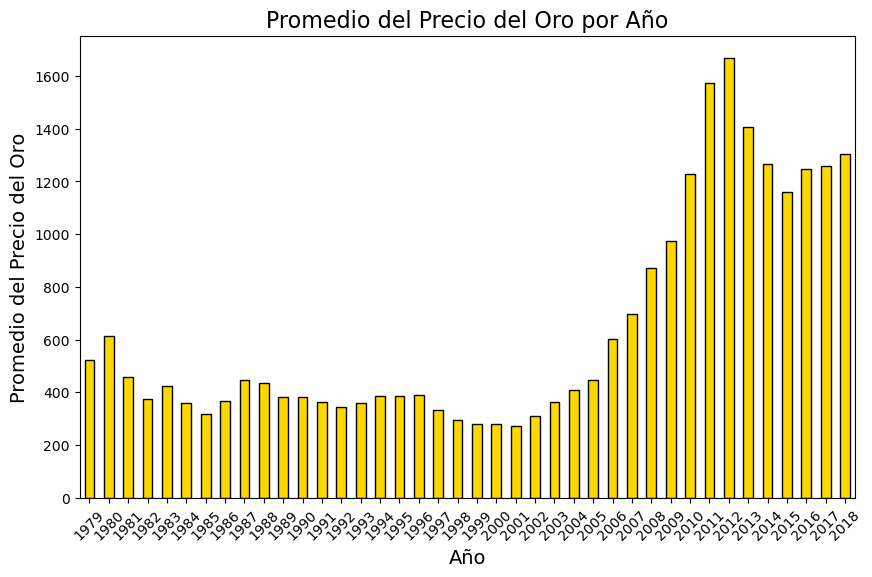

In [30]:
# Creo el gráfico de barras

plt.figure(figsize=(10, 6))
PrecioPromedio.plot(kind='bar', color='gold', edgecolor='black')

# Agrego Títulos y etiquetas

plt.title('Promedio del Precio del Oro por Año', fontsize=16)
plt.xlabel('Año', fontsize=14)
plt.ylabel('Promedio del Precio del Oro', fontsize=14)

plt.xticks(rotation=45)
plt.show()

# 10) Calcular el año con mayor promedio y el año con menor promedio.

In [33]:
# Calculo el año con mayor y menor promedio de precio

AñoMayorPromedio = PrecioPromedio.idxmax()
AñoMenorPromedio = PrecioPromedio.idxmin()

# Obtengo los valores promedio correspondientes

MayorPromedio = PrecioPromedio.max()
MenorPromedio = PrecioPromedio.min()

print(f"Año con el mayor promedio: {AñoMayorPromedio} con un precio de {MayorPromedio}")
print(f"Año con el menor promedio: {AñoMenorPromedio} con un precio de {MenorPromedio}")

Año con el mayor promedio: 2012 con un precio de 1669.1571428571428
Año con el menor promedio: 2001 con un precio de 271.0688259109312
